<a href="https://colab.research.google.com/github/Apofice2/PFE/blob/main/Test_PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PFE
**Dans cette partie nous nous interressons a la "saillancy map" d'un réseau convolutif simple **

In [ ]:
#importation de librairie
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1)Chargement d'un dataset (tiny imagenet)

In [ ]:
def load_dataset():
	"""
		Load the CIFAR-10 dataset
	"""

	return cifar10.load_data()

In [ ]:
import keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()



170498071/170498071 [==============================] - 7s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


#2) réseau à convolution simple

In [ ]:
# Normalize pixel values to be between 0 and 1
def normalisation(train_images, test_images):

  train_images, test_images = train_images / 255.0, test_images / 255.0

normalisation(train_images, test_images)


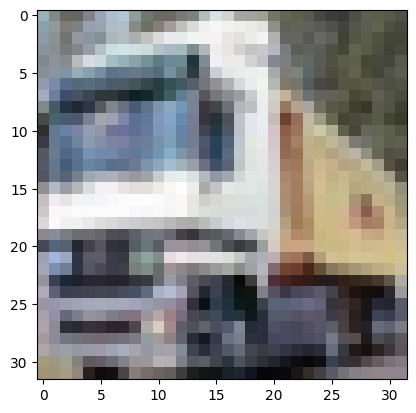

In [ ]:
plt.imshow(train_images[1])

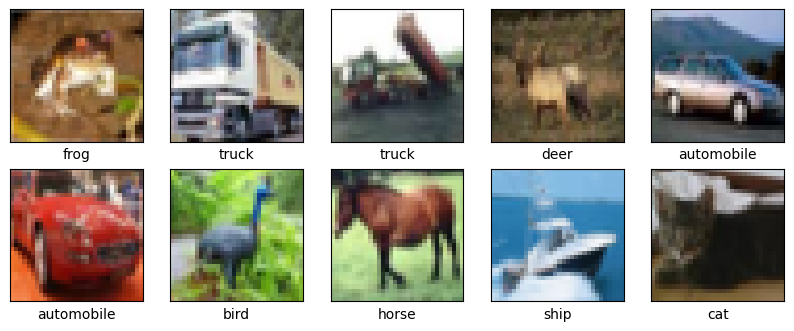

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
def figure():

  plt.figure(figsize=(10,10))
  for i in range(10):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i])
      # The CIFAR labels happen to be arrays,
      # which is why you need the extra index
      plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

figure()

**Création d'un model a convolution:**

1.   *3 couches de convolution 2D 64 neurones*
2.   *une couche dense 64 neurones*



In [ ]:

def model_convolution():

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
  return model

model_convolution()

initialisation du model

In [ ]:

def model_init(model):

  model.summary()

model_init(model_convolution())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model=model_convolution()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.7396 - accuracy: 0.4042 - val_loss: 1.3823 - val_accuracy: 0.4982
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.2955 - accuracy: 0.5371 - val_loss: 1.1905 - val_accuracy: 0.5749
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1419 - accuracy: 0.5982 - val_loss: 1.2105 - val_accuracy: 0.5753
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0458 - accuracy: 0.6357 - val_loss: 1.0686 - val_accuracy: 0.6303
Epoch 5/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9687 - accuracy: 0.6616 - val_loss: 1.0997 - val_accuracy: 0.6287
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9023 - accuracy: 0.6855 - val_loss: 1.0494 - val_accuracy: 0.6384
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8525 - accuracy: 0.7040 - val_loss: 1.1005 -

[[[ 79  98  89]
  [100 135 195]
  [153  53  45]
  ...
  [ 46 100 162]
  [ 53 109  50]
  [ 41 160 117]]

 [[ 95 210 196]
  [158 199  94]
  [105 196  78]
  ...
  [ 55 160 145]
  [ 79 103 104]
  [ 74 104 163]]

 [[169 166  77]
  [ 96 136  91]
  [ 86 147 167]
  ...
  [131 136 131]
  [ 51  95  48]
  [ 84  67  45]]

 ...

 [[ 87 175 217]
  [192  82 168]
  [ 96 166  80]
  ...
  [123  44  39]
  [121  73  97]
  [115 174  96]]

 [[125 110 185]
  [178  90  63]
  [160  79 126]
  ...
  [179  55  89]
  [108  78  73]
  [198 122  79]]

 [[176 121 158]
  [199  74 160]
  [126 166 197]
  ...
  [181 142 186]
  [147 179 122]
  [126 117  80]]]


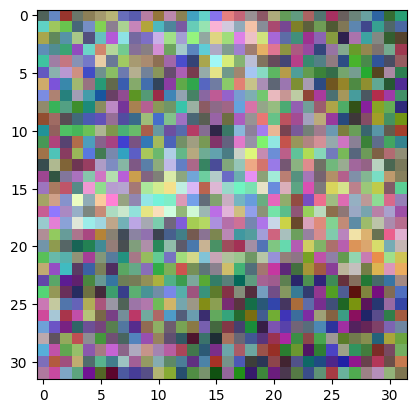

In [ ]:
import scipy
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def bruitage(image):
  noise_image = image + 5 * image.std() * np.random.random(image.shape)
  noise_image = np.uint8( ( noise_image / noise_image.max() ) * 255 )
  return noise_image

h=bruitage(train_images[1])
plt.imshow(h)
print(h)

In [ ]:
def grey_image(image):
  return  color.rgb2grey(image)


j=grey_image(test_images[3])
plt.imshow(j)

AttributeError: ignored

In [ ]:
type(test_images)
test_images.shape
print(test_images.shape)
print(bruitage(test_images).shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


313/313 - 4s - loss: 1.0125 - accuracy: 0.6706 - 4s/epoch - 13ms/step


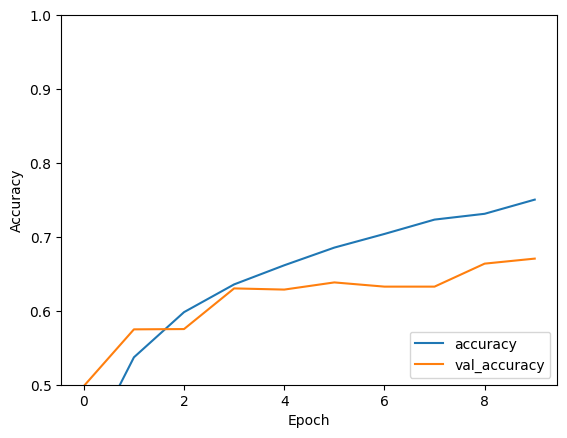

In [ ]:
from matplotlib import image
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)



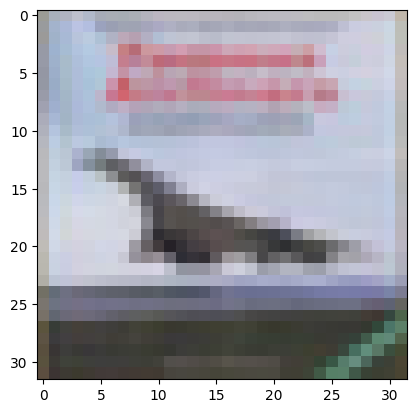

In [ ]:
plt.imshow(test_images[3])

In [ ]:
print('accuracy:',test_acc)
print('loss :',test_loss)

accuracy: 0.6705999970436096
loss : 1.0125049352645874


313/313 - 5s - loss: 2.9075 - accuracy: 0.1589 - 5s/epoch - 16ms/step


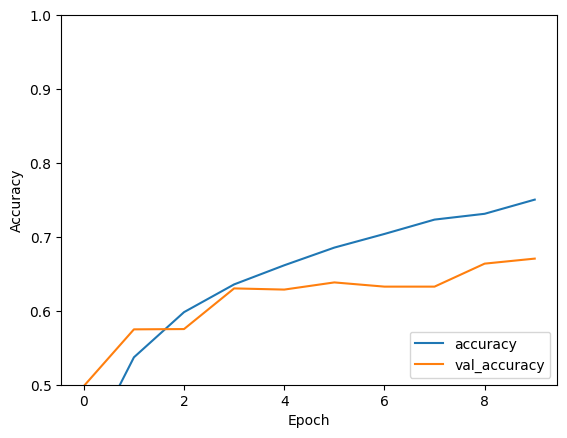

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(bruitage(test_images),  test_labels, verbose=2)



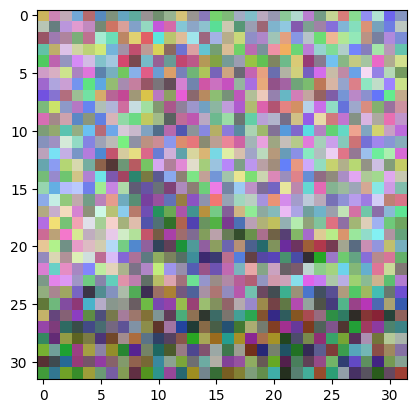

In [ ]:
plt.imshow(bruitage(test_images[3]))

In [ ]:
print('accuracy:',test_acc)
print('loss :',test_loss)




accuracy: 0.15889999270439148
loss : 2.9074840545654297


313/313 - 4s - loss: 2.9047 - accuracy: 0.2437 - 4s/epoch - 13ms/step
313/313 - 4s - loss: 2.9047 - accuracy: 0.2437 - 4s/epoch - 12ms/step


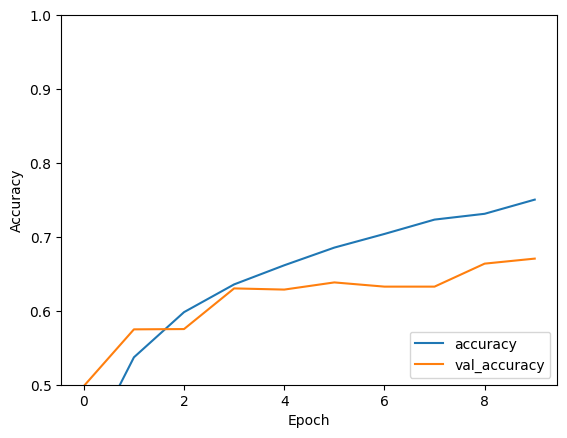

In [ ]:
def inverse_couleur(images):
  array_inver = images.copy()
  array_inver = 255 - array_inver
  return array_inver

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(inverse_couleur(test_images),  test_labels, verbose=2)

y_pred=model.evaluate(inverse_couleur(test_images),  test_labels, verbose=2)[1]

accuracy: 0.24369999766349792
loss : 2.9046881198883057


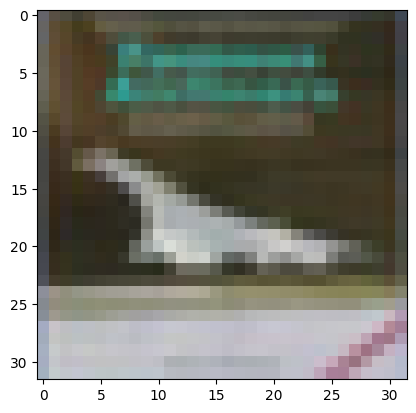

In [ ]:
plt.imshow(inverse_couleur(test_images[3]))
print('accuracy:',test_acc)
print('loss :',test_loss)


<function matplotlib.pyplot.show(close=None, block=None)>

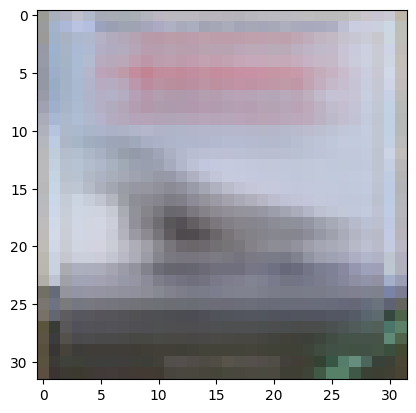

In [ ]:
#floutage
from PIL import ImageFilter
from PIL import Image
img = Image.fromarray( test_images [3] )
img_BLUR = img.filter( ImageFilter.BLUR )
plt.imshow(img_BLUR)
plt.show


# **definition de l'optimisation de la formule**

                         **OPTIMISATION ET FORMULE ARTICLE **
$$ m^*=argmin({λ*||1-m||_1+f_c(\phi(x_0:m)})$$

$$[\phi(x_0:m)](u)=\{m(x_0)=(m(u)*x_0(u)+(1-m(u)))*u_0\} $$


In [ ]:
#import
from numpy import linalg as la
import matplotlib.pyplot as plt

In [ ]:
#image test
_img_=test_images[3]

In [ ]:
from numpy.core.fromnumeric import shape
#le m initial
def m_init(image):
  m=image*np.random.uniform(0,1)/(image)
  return m

#définition de la modification via phi

def phi(image,m):
  phi=m*image+(1-m)
  return phi

#définition de la formule à minimisé

def f(m,phi):
  phi=phi.reshape((1,*phi.shape))
  pred = model(phi, training=False)
  contrainte=0.5*la.norm(1-m)
  return contrainte+pred


masque_init=m_init(_img_)



In [ ]:
#le m initial
print(masque_init.shape)

In [ ]:
#Résultat du passage de phi(m,x) dans le réseau de neurone
print(f(masque_init,phi(_img_,masque_init)))

In [ ]:
#définition d'une descente de gradient de la formule en fonction de m
def grad_f(m,phi,image):

  #on définie la variable de dérivation
  phi=phi.reshape((1,*phi.shape))
  fonction_phi = tf.Variable(phi, dtype=float)
  fonction_m = tf.Variable(m, dtype=float)
  pred = model(phi, training=False)

  X=pred
  print(X)

  with tf.GradientTape() as tape:


    #applatie en 1d la matrice
    class_idxs_sorted = np.argsort(X.numpy().flatten())[::-1]
    #[class_idxs_sorted[0]]
    loss = X[0][class_idxs_sorted[0]]
    print(loss)
  #calcule du gradien
  grads = tape.gradient(loss, fonction_phi)

  grads2 =image-1


  #dgrad_abs = tf.math.abs(grads)
  #dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

  return  grads*grads2



In [ ]:
print(grad_f(masque_init,phi(_img_,masque_init),_img_))


In [ ]:
#algorithme de gradien sto
def gradient_std(masque_init,image,t=0.5,Niter=1000,phi):
    m = masque_init
    for i in range (Niter):
        g=grad_f(m,phi(_img_,m),image)[0]
        m=m-t*g
    print("Pas de convergence après", Niter, "itérations")
    return m

In [ ]:
gradient_std(m_init(_img_),_img_,t=0.5,Niter=1000)

## **CARTE DE SAILLANCE**

In [ ]:
print('tensorflow {}'.format(tf.__version__))
print("keras {}".format(keras.__version__))

tensorflow 2.12.0
keras 2.12.0


In [ ]:

test_image=test_images[3]



In [ ]:
test_image=test_image.reshape((1,*test_image.shape))
images = tf.Variable(test_image, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    print(loss)
    print(class_idxs_sorted)
grads = tape.gradient(loss, images)

dgrad_abs = tf.math.abs(grads)
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]
print(pred)

tf.Tensor(3.3117974, shape=(), dtype=float32)
[0 8 1 9 3 6 2 4 5 7]
tf.Tensor(
[[ 3.3117974   2.7766755  -0.76734847  0.19945946 -0.8766576  -2.1927693
  -0.287171   -2.2291284   3.2887034   1.7191228 ]], shape=(1, 10), dtype=float32)


In [ ]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

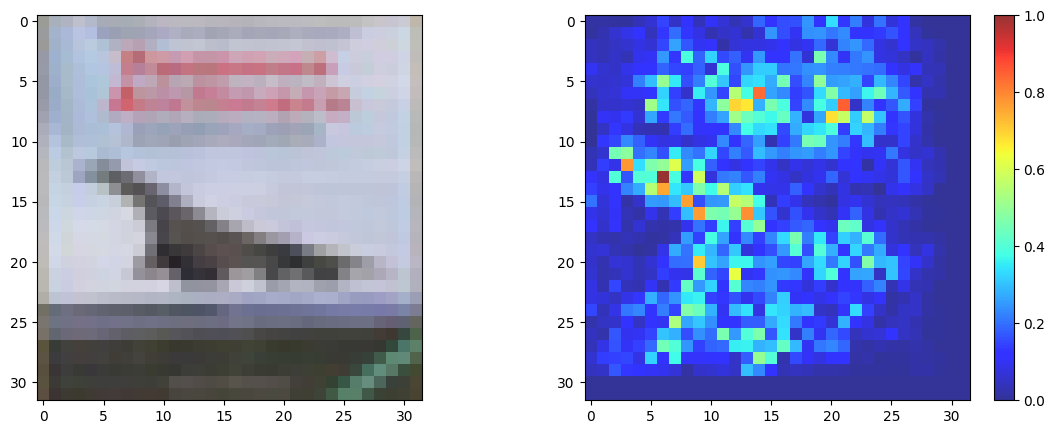

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(test_images[3])
#.reshape((1,*test_image.shape))
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

# MobilNet section

In [ ]:
"""
#Création du modèle mobileNet
model2 = tf.keras.applications.mobilenet.MobileNet()
model2.build(input_shape = (224,224,3))
model2.summary()
"""

In [ ]:
"""
img_resized=[]

for img in range(len(train_images)):
     img_r=np.resize(train_images[img],(224, 224,3))
     img_resized.append(img_r)
print(img_resized)


'''print(train_images[0].size)
img_resized=np.resize(train_images[0],(224, 224,3))
print(img_resized.shape)
'''
'''model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])'''


#train_images[0].resize(150528)


'''history2 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))'''


                    """
